Need to clean the notebook before the meeting

CSSG info session preparation

In [7]:
import color_demo
import numpy as np
import om10
import astropy.io.fits
import astropy
from astropy.io import fits

1.txt contains Lens Name . . . u g r i z . . .

2.txt contains LensName Redshift . . . . . . .

3.txt contains Name	Obs. Date	Instrument	Slit	Width	Seeing	Exp. Time	z_d	z_s	sigma	S/N	Resolution

I need to merge all the textfiles. III_a and III_b is III table 4 and 5
IV is table 3

In [8]:
III_a = np.genfromtxt('../1.txt', dtype=str, usecols = (0, 4, 5, 6, 7, 8), invalid_raise=False, missing_values='xxx', usemask=False)
III_b = np.genfromtxt('../2.txt', dtype=str, usecols = (0, 1), invalid_raise=False, missing_values='xxx')
IV = np.genfromtxt('../3.txt', dtype=str, usecols = (0, 11), invalid_raise=False, missing_values='xxx')
name = np.array([])
redshift = np.array([])
veldisp = np.array([])
u = np.array([])
g = np.array([])
r = np.array([])
i = np.array([])
z = np.array([])
# O(n)
for (lensName, aIndex) in zip(III_a[:,0], range(len(III_a))):
    if lensName in III_b[:,0]:
        # assuming one occurence
        bIndex = np.argwhere(III_b[:,0]==lensName)[0][0]
        if lensName in IV[:,0]:
            VIndex = np.argwhere(IV[:,0]==lensName)[0][0]
            # only redshift has the problem
            if(IV[VIndex][1].isdigit()):
                name = np.append(name, lensName)
                redshift = np.append(redshift, float(III_b[bIndex][1]))
                veldisp = np.append(veldisp, float(IV[VIndex][1]))
                u = np.append(u, float(III_a[aIndex][1]))
                g = np.append(g, float(III_a[aIndex][2]))
                r = np.append(r, float(III_a[aIndex][3]))
                i = np.append(i, float(III_a[aIndex][4]))
                z = np.append(z, float(III_a[aIndex][5]))
from astropy.table import Table
table = Table([name, redshift, veldisp, u, g, r, i, z], names=['ID', 'ZLENS', 'VELDISP', 'MAGU', 'MAGG', 'MAGR', 'MAGI', 'MAGZ'])
np.savetxt('merged.txt', (name,redshift,veldisp,u,g,r,i,z), header="% name redshift veldisp u g r i z", fmt='%s') 

column : name redshift veldisp u g r i z

In [9]:
#from astropy.table import Table
#table = Table.read('merged.txt', format='ascii')
#meta={'name': 'first table'}
db = om10.DB(catalog='/Users/Jenny/Desktop/om10fork/om10/data/qso_mock.fits')
db.sample = table
db.lenses = table
# okay so speed did not change at ALL T_T
db.paint(synthetic=True, target='lens')
print db.sample

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
        ID         ZLENS VELDISP ...       GR            RI             IZ      
------------------ ----- ------- ... ------------- -------------- --------------
SL2SJ020833-071414 0.428   295.0 ... 1.88424410291  0.78479189902 0.468315074143
SL2SJ021206-075528  0.46   257.0 ... 1.86680136552 0.895877938783 0.492809763567
SL2SJ021247-055552  0.75   273.0 ... 2.21975280087  1.45415342328 0.786577886695
SL2SJ021325-074355 0.717   293.0 ... 2.05399282671  1.51250318857 0.698740100287
SL2SJ021411-040502 0.609   287.0 ... 1.85807045021  1.32383455285 0.566743564553
SL2SJ021737-051329 0.646   239.0 ... 1.90976451375  1.41048731351 0.596019895931
SL2SJ021902-082934 0.389   289.0 ... 1.91471222948 0.690622224809 0.425484277461
SL2SJ022046-094927 0.572   254.0 ... 1.81691731957  1.25331382498 0.549198869942
SL2SJ022056-063934  0.33   231.0 ... 1.87001743779  0.63710657092 0.348790049871
SL2SJ022346-

In [10]:
fig1 = om10.plot_sample(db.sample, color='blue', parameters=('MAGI','ZLENS', 'GR', 'RI', 'IZ'))

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


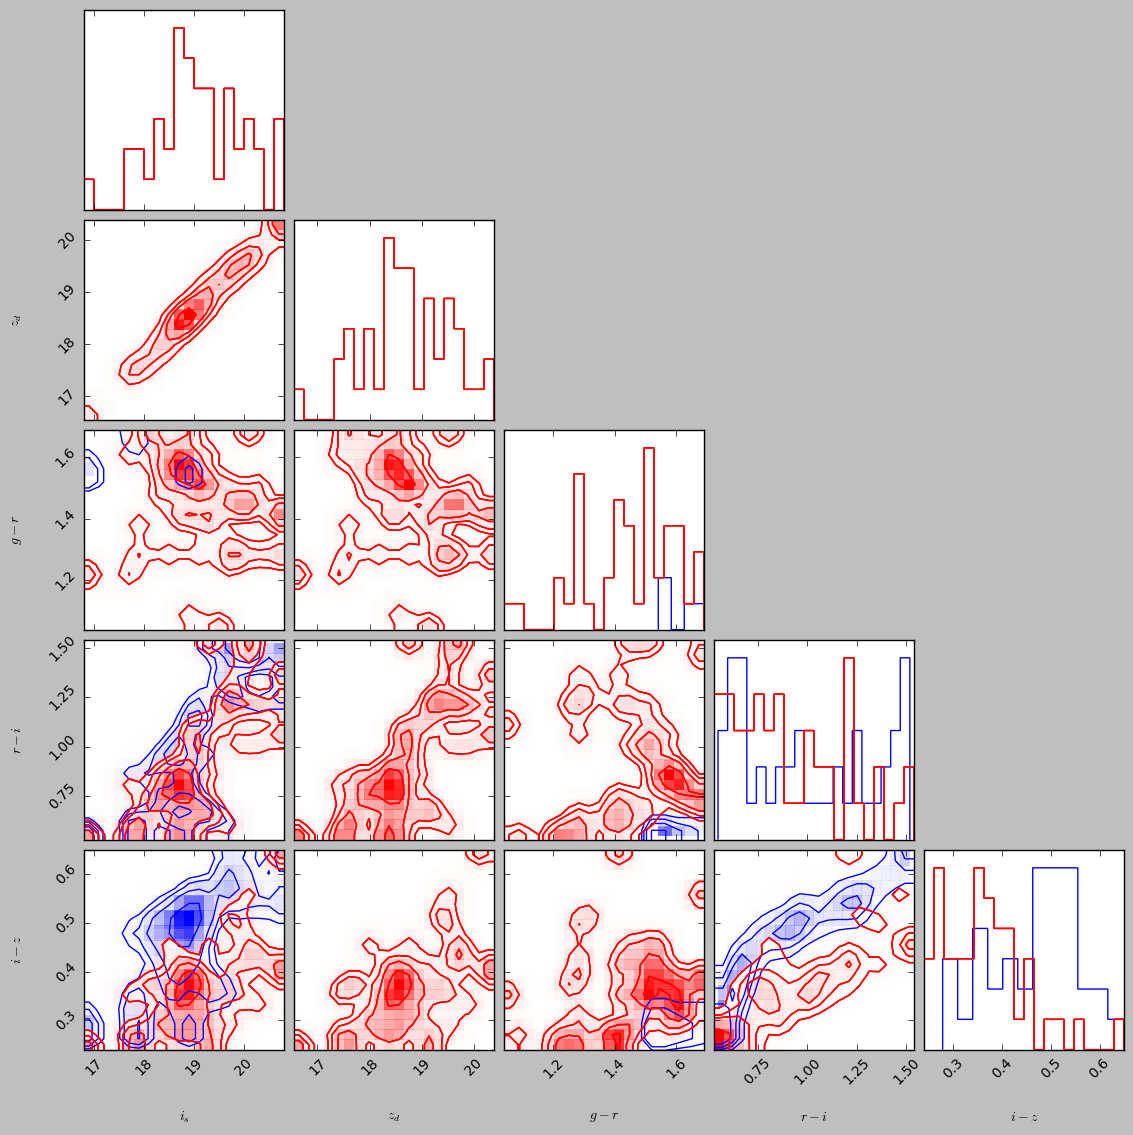

In [18]:
import matplotlib
%matplotlib inline
matplotlib.rc('text', usetex=False)
gr = g-r
ri = r-i
iz = i-z
data = Table({'MAGI': i, 'ZLENS': z, 'GR': gr, 'RI': ri, 'IZ': iz}, names=['MAGI', 'ZLENS', 'GR', 'RI', 'IZ'])
axis_labels = {}
axis_labels['ZLENS'] = '$redshift$'
axis_labels['MAGI'] = '$i$'
axis_labels['GR'] = '$g-r$'
axis_labels['RI'] = '$r-i$'
axis_labels['IZ'] = '$i-z$'
from om10 import plotting
import corner
features, labels = plotting.extract_features(data, ('MAGI','ZLENS', 'GR', 'RI', 'IZ'))
corner.corner(features, labels=labels, color='red', smooth=1.0, fig=fig1)